<a href="https://colab.research.google.com/github/Philippeizidorio/AnaliseVarejo/blob/main/An%C3%A1liseVarejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pnd
import matplotlib.pyplot as plt

In [2]:
vendas = pnd.read_excel("/content/varejo.xlsx")
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [3]:
# Aqui identificamos que os atributos 'preço' e 'estado' possuem espaços nulos
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [4]:
# Agrupamos o 'idcanalvendas' por quant. únicas de compras
# Percebemos que há uma redundância entre APP e Aplicativo, sendo necessária uma substituição com a função 'replace'
vendas.groupby("idcanalvenda").idcompra.nunique().reset_index()

,idcanalvenda,idcompra
0,APP,139
1,Aplicativo,21425
2,Internet,24515
3,Mobile,24732


In [5]:
#Aplicando Replace
vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP", "Aplicativo")
vendas.groupby("idcanalvenda").idcompra.nunique().reset_index()

,idcanalvenda,idcompra
0,Aplicativo,21539
1,Internet,24515
2,Mobile,24732


In [6]:
#Verificando se há redundâncias em 'bandeira' e quant. de compras únicas
vendas.groupby("bandeira").idcompra.nunique().reset_index()

,bandeira,idcompra
0,A,27679
1,B,38483


In [7]:
#Verificando se há redundâncias em 'nome_departamento' e quant. de compras únicas
vendas.groupby("Nome_Departamento").idcompra.nunique().reset_index()

,Nome_Departamento,idcompra
0,Acessorios e Inovacoes,3548
1,Alimentos,2
2,Ar e Ventilacao,951
3,Audio,1794
4,Automotivo,895
5,Bebes,4531
6,Beleza e Saude,4626
7,Brinquedos,1320
8,"Cama, Mesa e Banho",153
9,Casa e Construcao,263


In [8]:
#Verificando se há redundâncias em 'estado' e quant. de compras únicas
vendas.groupby("estado").idcompra.nunique().reset_index()

,estado,idcompra
0,AC,10
1,AL,461
2,AM,15
3,AP,3
4,BA,2028
5,CE,1007
6,DF,1902
7,ES,1254
8,GO,1603
9,MA,129


In [67]:
# substituindo os espaços " " por "_" em 'Nome_Departamento' como sendo uma boa prática
vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ", "_")
agg_vendasdp = vendas.groupby("Nome_Departamento").idcompra.nunique().reset_index()
agg_vendasdp

,Nome_Departamento,idcompra
0,Acessorios_e_Inovacoes,3548
1,Alimentos,2
2,Ar_e_Ventilacao,951
3,Audio,1794
4,Automotivo,895
5,Bebes,4531
6,Beleza_e_Saude,4626
7,Brinquedos,1320
8,"Cama,_Mesa_e_Banho",153
9,Casa_e_Construcao,263


In [10]:
# Verificando nulos em 'estado'
vendas[vendas['estado'].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [11]:
# Substituindo nulos em 'estado' por MS
vendas["estado"].fillna("MS", inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [12]:
#Substituindo 'Preço' em branco pela média de todos os preços
média_preco = vendas["Preço"].mean()
vendas["Preço"].fillna(média_preco, inplace=True)
média_preco

906.5891285439033

In [13]:
#Após substituirmos os valores em branco, agora não temos mais valores nulos.
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [14]:
#Consultando os valores substituídos
vendas.query("estado == 'MS'")

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,906.589129,879.200,Telefones_e_Celulares,MS,5804
284,346055,Internet,A,2023-03-23,906.589129,87.648,Ar_e_Ventilacao,MS,16359
402,172555,Mobile,A,2023-03-19,906.589129,135.840,Ar_e_Ventilacao,MS,13691
411,446380,Mobile,A,2023-03-09,906.589129,1703.120,Eletrodomesticos,MS,13024
770,40425,Mobile,B,2023-04-21,906.589129,1759.200,Telefones_e_Celulares,MS,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,906.589129,339.912,Eletroportateis,MS,20873
78718,320895,Mobile,B,2023-01-20,906.589129,1000.800,Telefones_e_Celulares,MS,17772
79465,389240,Aplicativo,A,2023-01-14,906.589129,279.200,Eletrodomesticos,MS,20399
79548,124585,Mobile,A,2023-04-21,906.589129,2051.240,TVs_e_Acessorios,MS,17784


In [15]:
# Analisando preço com e sem frete
vendas[["Preço","Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [16]:
#Aplicando regra de negócio(Preço < Preço_com_frete)
preço_correto =  vendas.query("Preço < Preço_com_frete")
preço_correto

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060
...,...,...,...,...,...,...,...,...,...
80023,351250,Internet,B,2023-01-29,661.68,676.736,Telefones_e_Celulares,SP,11429
80069,362035,Mobile,A,2023-04-25,95.92,101.600,Beleza_e_Saude,SP,26
80090,466615,Internet,B,2023-03-30,735.20,750.256,Telefones_e_Celulares,SP,3128
80104,335120,Aplicativo,B,2023-04-17,55.92,60.776,Beleza_e_Saude,RJ,13206


In [17]:
#Aplicando describe, percebemos que havia muito preço errado pela contagem(A: 80K | D: 22K)
preço_correto.describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047,22047.000000,22047.000000,22047.000000
mean,253799.955550,2023-03-02 05:19:31.261395968,549.518401,567.332688,13856.313013
min,25.000000,2023-01-02 00:00:00,8.720000,9.512000,1.000000
25%,127670.000000,2023-02-01 00:00:00,93.528000,100.800000,6858.000000
50%,257885.000000,2023-03-02 00:00:00,183.200000,193.912000,13845.000000
75%,379705.000000,2023-04-01 00:00:00,661.680000,676.736000,20801.000000
max,499960.000000,2023-04-30 00:00:00,14391.200000,14407.120000,27982.000000
std,144794.628563,NaN,846.295127,863.458763,8049.120135


In [18]:
#Retomando algumas linhas da tabela
preço_correto.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


In [19]:
#Aplicando describe nos dados filtrados para analisar uma categoria específica
preço_correto.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP'").describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,168.000000,168,168.000000,168.00000,168.000000
mean,265130.744048,2023-03-05 23:51:25.714285824,1070.083095,1098.71319,14368.571429
min,2145.000000,2023-01-02 00:00:00,10.896000,16.11200,210.000000
25%,157955.000000,2023-02-03 18:00:00,527.200000,545.32000,7717.500000
50%,253702.500000,2023-03-07 00:00:00,1108.008000,1136.24800,15281.000000
75%,380616.250000,2023-04-09 00:00:00,1599.200000,1618.88400,20538.000000
max,496910.000000,2023-04-30 00:00:00,2399.200000,2432.74400,27837.000000
std,140435.252208,NaN,617.138494,620.66244,7890.233136


In [20]:
# Contagem de departamentos mais vendidos
preço_correto.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending = False).reset_index()

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


In [21]:
# Média de preço com frete por departamento
round(preço_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending =False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


In [22]:
#Criando coluna "Mês" para realizar agrupamento
preço_correto["Mês"] = preço_correto["Data"].dt.month
preço_correto.head()

<ipython-input-22-368721aa0e9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preço_correto["Mês"] = preço_correto["Data"].dt.month


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2


In [23]:
# Agrupando a quantidade de vendas na Data
preço_correto.groupby("Data").idcompra.nunique().sort_values(ascending=False).reset_index()

,Data,idcompra
0,2023-02-13,226
1,2023-01-20,218
2,2023-03-07,215
3,2023-03-30,214
4,2023-02-20,214
...,...,...
114,2023-02-15,162
115,2023-04-04,162
116,2023-02-25,161
117,2023-02-22,156


In [24]:
# Agrupando a quantidade de vendas pelo mês
preço_correto.groupby("Mês").idcompra.nunique().sort_values(ascending=False).reset_index()

,Mês,idcompra
0,3,5590
1,4,5454
2,1,5309
3,2,5138


In [25]:
#Formatando a coluna mês
preço_correto["Mês"] = preço_correto["Data"].dt.strftime('%B')
preço_correto.head()

<ipython-input-25-fb3817a7adc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preço_correto["Mês"] = preço_correto["Data"].dt.strftime('%B')


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,March
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,March
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,February
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,March
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,February


In [26]:
# Agrupando pelo mês após formatação
agg_mescp = preço_correto.groupby("Mês").idcompra.nunique().sort_values(ascending=False).reset_index()
agg_mescp

,Mês,idcompra
0,March,5590
1,April,5454
2,January,5309
3,February,5138


In [27]:
# Importando a segunda base para realizar JOIN
Cliente_db = pnd.read_excel("/content/cliente_varejo.xlsx")
Cliente_db.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [28]:
#Análise Descritiva na base cliente
Cliente_db[["idade", "renda"]].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [29]:
#Checando se temos dados nulos
Cliente_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [30]:
#Transformando a renda como tipo Float
Cliente_db = Cliente_db.astype({"renda": "float"})
Cliente_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [31]:
#Realizando Join
vendas_cliente =  preço_correto.merge(Cliente_db, how="left", on="cliente_Log")
vendas_cliente.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mês,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,March,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,March,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,March,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,March,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,February,78,6596.0


In [32]:
# Média de renda para cada tipo de canal de venda
agg_idcanalrenda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending =False).reset_index(),2)
agg_idcanalrenda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


In [33]:
# Média de idade de clientes por bandeira
agg_bandeira_idade= round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending =False).reset_index(),2)
agg_bandeira_idade

,bandeira,idade
0,A,53.30
1,B,53.29


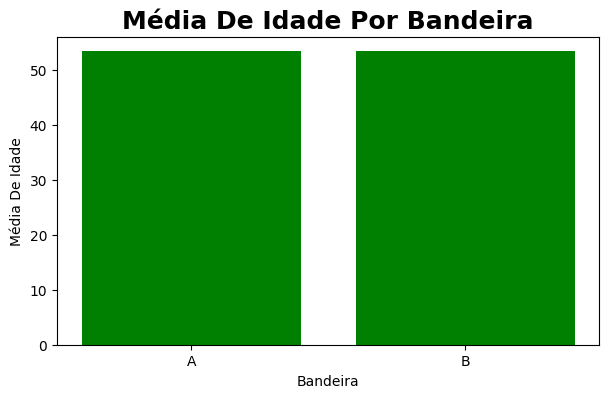

In [34]:
#Gráfico idade de clientes por bandeiras(Matplotlib)
#Definindo o tamanho com 'fig'
fig = plt.figure(figsize=(7,4))
#Definindo eixo 'x' e 'y'
plt.bar(agg_bandeira_idade["bandeira"], agg_bandeira_idade["idade"], color="green")
#Definindo título do eixo 'y' e 'x'
plt.ylabel("Média De Idade")
plt.xlabel("Bandeira")
#Definindo título do gráfico
plt.title("Média De Idade Por Bandeira", loc="center", fontsize=18, fontweight="bold", color="black");

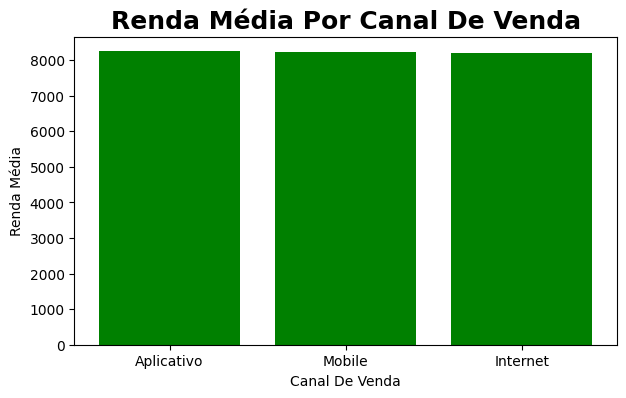

In [35]:
#Gráfico de renda média por canal de vendas(Matplotlib)
#Definindo o tamanho com 'fig'
fig = plt.figure(figsize=(7,4))
#Definindo eixo 'x' e 'y'
plt.bar(agg_idcanalrenda["idcanalvenda"], agg_idcanalrenda["renda"], color="green")
#Definindo título do eixo 'y' e 'x'
plt.ylabel("Renda Média")
plt.xlabel("Canal De Venda")
#Definindo título do gráfico
plt.title("Renda Média Por Canal De Venda", loc="center", fontsize=18, fontweight="bold", color="black");

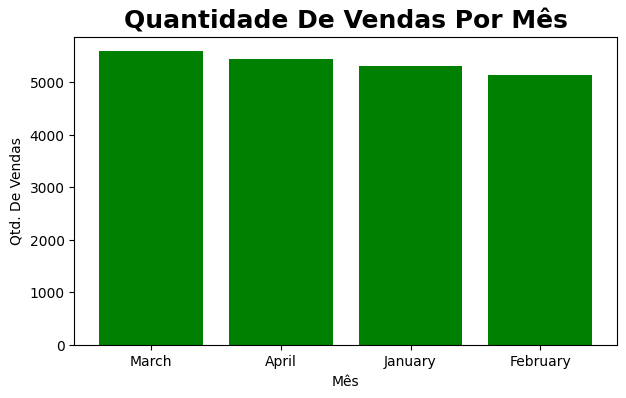

In [36]:
#Gráfico quantidade vendas por mês(Matplotlib)
#Definindo o tamanho com 'fig'
fig = plt.figure(figsize=(7,4))
#Definindo eixo 'x' e 'y'
plt.bar(agg_mescp["Mês"], agg_mescp["idcompra"], color="green")
#Definindo título do eixo 'y' e 'x'
plt.ylabel("Qtd. De Vendas")
plt.xlabel("Mês")
#Definindo título do gráfico
plt.title("Quantidade De Vendas Por Mês", loc="center", fontsize=18, fontweight="bold", color="black");

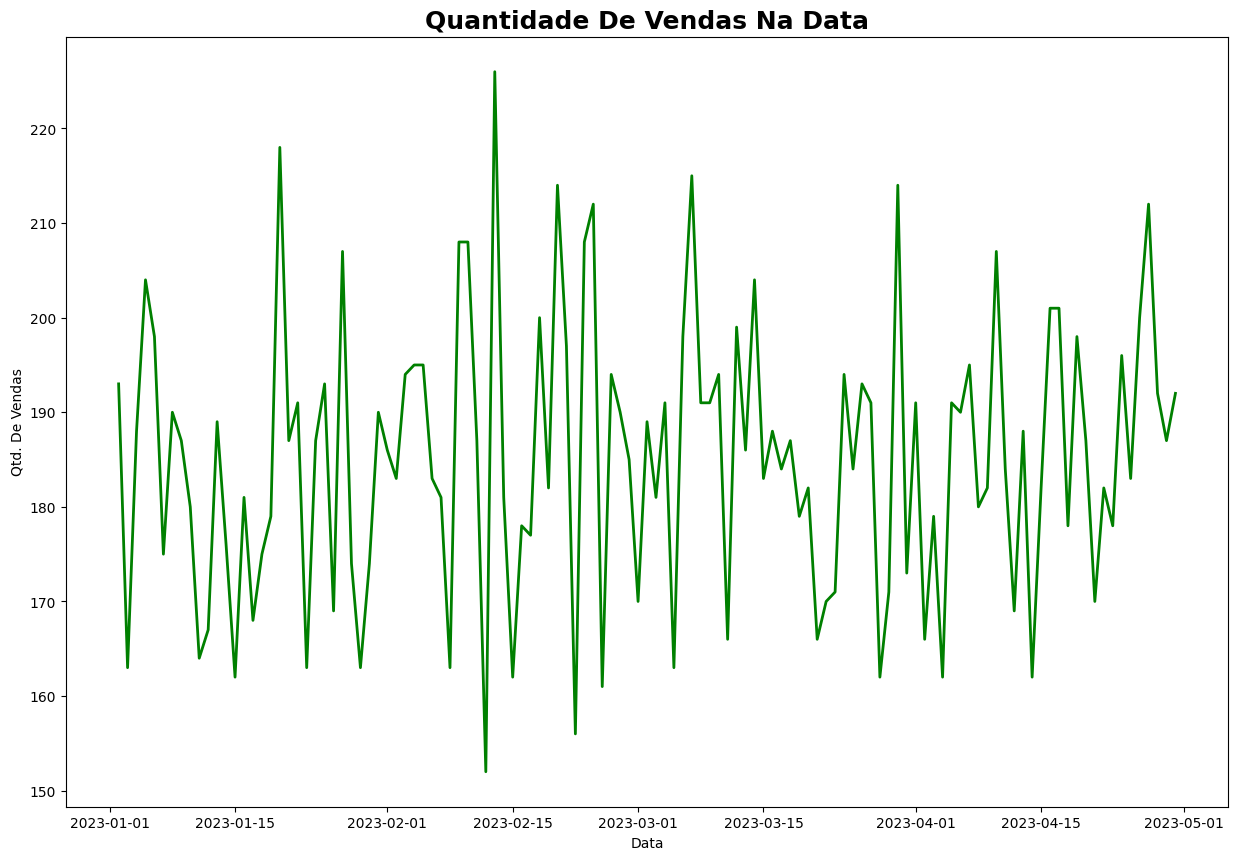

In [37]:
# Gráfico da quantidade de vendas na Data(Matplotlib)
vendas_data = preço_correto.groupby("Data").idcompra.nunique().reset_index()
#Definindo o tamanho com 'fig'
fig = plt.figure(figsize=(15,10))
#Definindo eixo 'x' e 'y'
plt.plot(vendas_data["Data"], vendas_data["idcompra"], color="green", linewidth=2)
#Definindo título do eixo 'y' e 'x'
plt.ylabel("Qtd. De Vendas")
plt.xlabel("Data")
#Definindo título do gráfico
plt.title("Quantidade De Vendas Na Data", loc="center", fontsize=18, fontweight="bold", color="black");

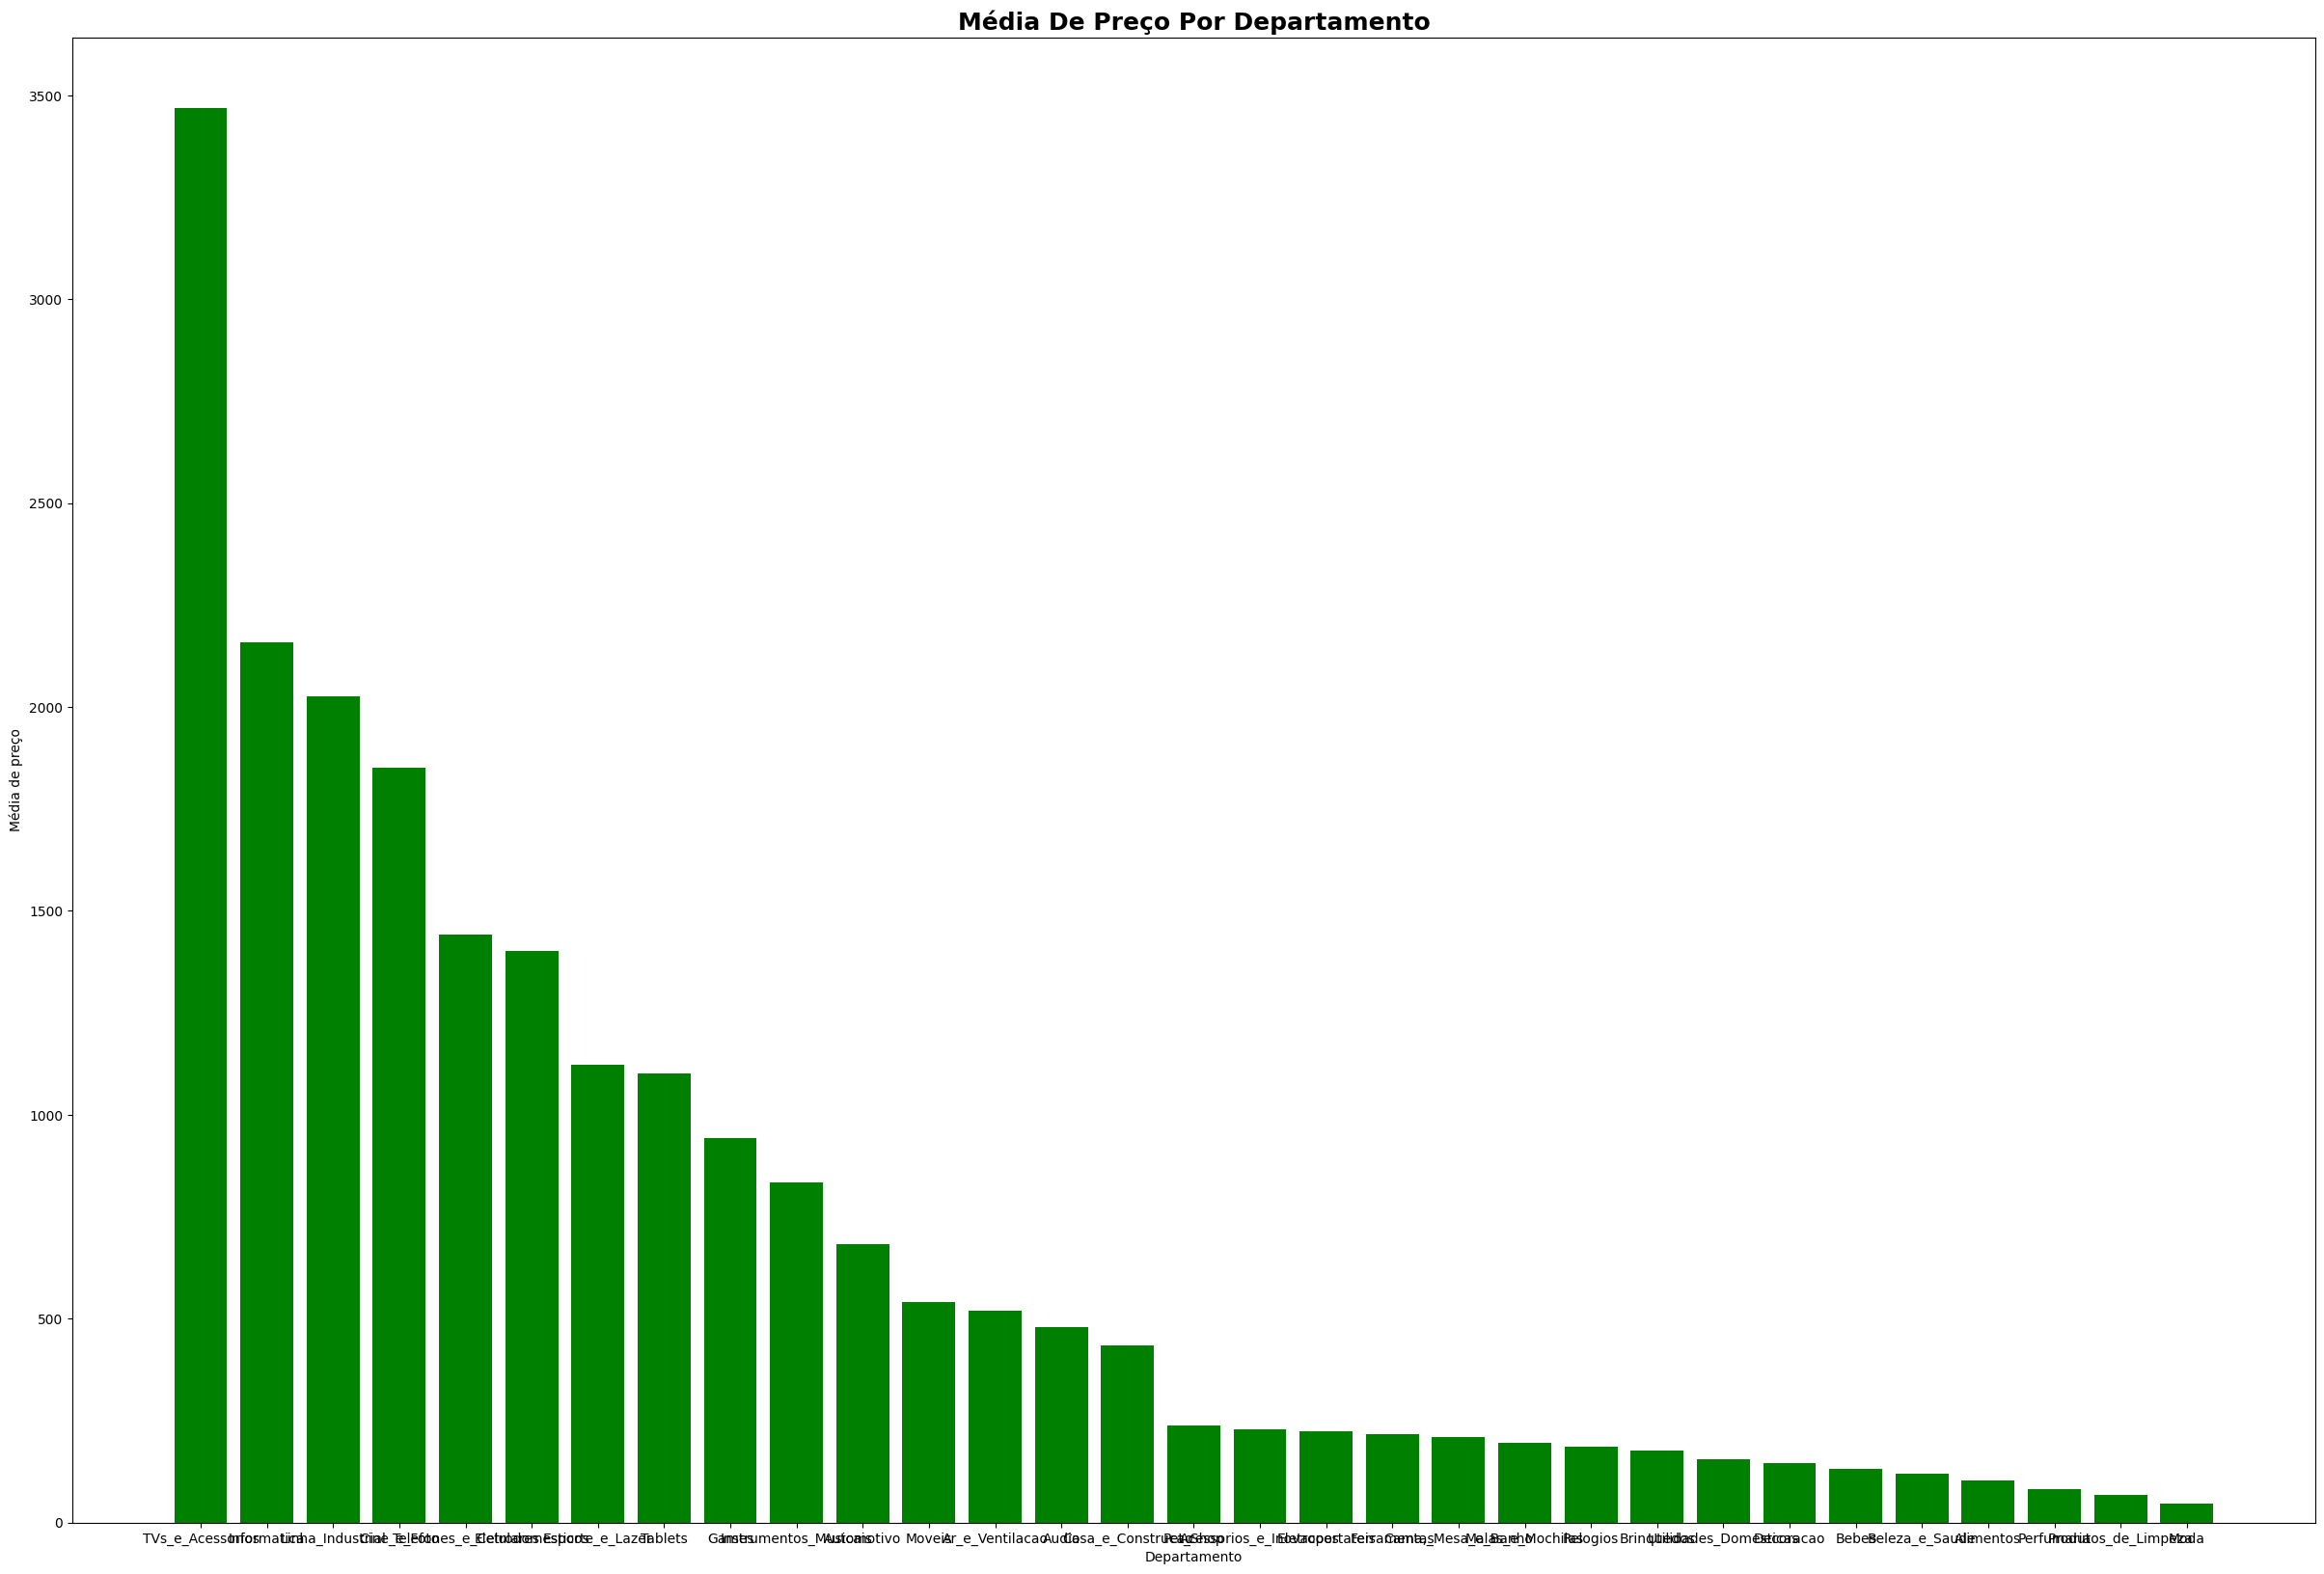

In [38]:
#Gráfico Média de preço com frete por departamento(Matplotlib)
agg_depart = round(preço_correto.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending =False).reset_index(),2)
#Definindo o tamanho com 'fig'
fig = plt.figure(figsize=(30,20))
#Definindo eixo 'x' e 'y'
plt.bar(agg_depart["Nome_Departamento"], agg_depart["Preço_com_frete"], color="green")
#Definindo título do eixo 'y' e 'x'
plt.ylabel("Média de preço")
plt.xlabel("Departamento")
#Definindo título do gráfico
plt.title("Média De Preço Por Departamento", loc="center", fontsize=18, fontweight="bold", color="black");

In [ ]:
#Instalando a biblioteca Plotly para plotar os gráficos
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [40]:
#Importando a Plotly
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

In [66]:
#Média de idade por bandeira com Potly
px.bar(agg_bandeira_idade, x="bandeira", y="idade", color_discrete_sequence=["green"])

In [65]:
#Gráfico quantidade de vendas na Data com Plotly
px.line(vendas_data, x="Data", y="idcompra", color_discrete_sequence=["green"])

In [64]:
#Média de preço com frete por departamento no Plotly
px.bar(agg_depart, x="Nome_Departamento", y="Preço_com_frete", color_discrete_sequence=["green"])

In [75]:
#Criando quant. de vendas por departamento em ordem decrescente
sortedt = agg_vendasdp.sort_values(by="idcompra", ascending=False)
sortedt

,Nome_Departamento,idcompra
30,Telefones_e_Celulares,14495
12,Eletrodomesticos,10501
13,Eletroportateis,9593
28,TVs_e_Acessorios,5326
17,Informatica,5290
6,Beleza_e_Saude,4626
5,Bebes,4531
22,Moveis,4175
31,Utilidades_Domesticas,3728
0,Acessorios_e_Inovacoes,3548


In [76]:
#Quant. De Vendas Por Departamento no Plotly em ordem decrescente
px.bar(sortedt, x="Nome_Departamento", y="idcompra", color_discrete_sequence=["green"])

In [79]:
#Filtrando colunas específicas de vendas ao mês para departamento
VendasM = vendas_cliente[["idcompra","Nome_Departamento", "Mês"]]
VendasM

,idcompra,Nome_Departamento,Mês
0,437305,Bebes,March
1,455795,Esporte_e_Lazer,March
2,455795,Esporte_e_Lazer,March
3,455795,Esporte_e_Lazer,March
4,75525,Moveis,February
...,...,...,...
42773,335120,Beleza_e_Saude,April
42774,335120,Beleza_e_Saude,April
42775,376985,Telefones_e_Celulares,February
42776,376985,Telefones_e_Celulares,February


In [81]:
#Filtrando apenas para mês de março
Marchv = VendasM.query("Mês == 'March'")
Marchv

,idcompra,Nome_Departamento,Mês
0,437305,Bebes,March
1,455795,Esporte_e_Lazer,March
2,455795,Esporte_e_Lazer,March
3,455795,Esporte_e_Lazer,March
5,258580,Bebes,March
...,...,...,...
42751,353395,Telefones_e_Celulares,March
42752,353395,Telefones_e_Celulares,March
42759,373070,Telefones_e_Celulares,March
42769,466615,Telefones_e_Celulares,March


In [87]:
#Agrupando departamento pela quantidade de vendas para Março
AggMarch = Marchv.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending = False).reset_index()
AggMarch

,Nome_Departamento,idcompra
0,Bebes,1138
1,Eletrodomesticos,1135
2,Eletroportateis,577
3,Moveis,512
4,Utilidades_Domesticas,351
5,Acessorios_e_Inovacoes,336
6,Beleza_e_Saude,281
7,Brinquedos,179
8,Perfumaria,151
9,Produtos_de_Limpeza,137


In [88]:
#Plotando gráfico de departamentos por quantidade de vendas no mês de Março
px.bar(AggMarch, x="Nome_Departamento", y="idcompra", color_discrete_sequence=["green"])